In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pickle

import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('dataset/listings_v2.csv')

# Number of rows and columns

df.shape

(8574, 75)

In [44]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33491101,https://www.airbnb.com/rooms/33491101,20220922013638,2022-09-22,city scrape,Casita refugio interior,NaN,"Es un lugar tranquilo, hay almacenes de barrio...",https://a0.muscache.com/pictures/87693f15-22f9...,252327165,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,41380910,https://www.airbnb.com/rooms/41380910,20220922013638,2022-09-22,city scrape,Casa Condominio Piscina Chamisero/8min de Vita...,"Casa Chamisero, diseñada por arquitecto Mathia...",NaN,https://a0.muscache.com/pictures/b75c6983-a281...,110039387,...,4.25,4.75,4.00,NaN,t,1,1,0,0,0.13
2,49392,https://www.airbnb.com/rooms/49392,20220922013638,2022-09-22,city scrape,Share my Flat in Providencia,<b>The space</b><br />Departamento en el barri...,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
3,52811,https://www.airbnb.com/rooms/52811,20220922013638,2022-09-22,city scrape,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Edificio ubicado en el acceso a la línea del M...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,...,4.59,4.64,4.36,NaN,t,3,3,0,0,0.32
4,53494,https://www.airbnb.com/rooms/53494,20220922013638,2022-09-22,city scrape,depto centro ski el colorado chile,<b>The space</b><br />depto 2 dormitorios equi...,NaN,https://a0.muscache.com/pictures/310938/cae3f1...,249097,...,4.89,4.73,4.68,NaN,f,1,1,0,0,0.50


In [45]:
# Remove null values

df.dropna(how='all', inplace=True, axis=0)

In [46]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33491101,https://www.airbnb.com/rooms/33491101,20220922013638,2022-09-22,city scrape,Casita refugio interior,NaN,"Es un lugar tranquilo, hay almacenes de barrio...",https://a0.muscache.com/pictures/87693f15-22f9...,252327165,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,41380910,https://www.airbnb.com/rooms/41380910,20220922013638,2022-09-22,city scrape,Casa Condominio Piscina Chamisero/8min de Vita...,"Casa Chamisero, diseñada por arquitecto Mathia...",NaN,https://a0.muscache.com/pictures/b75c6983-a281...,110039387,...,4.25,4.75,4.00,NaN,t,1,1,0,0,0.13
2,49392,https://www.airbnb.com/rooms/49392,20220922013638,2022-09-22,city scrape,Share my Flat in Providencia,<b>The space</b><br />Departamento en el barri...,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
3,52811,https://www.airbnb.com/rooms/52811,20220922013638,2022-09-22,city scrape,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Edificio ubicado en el acceso a la línea del M...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,...,4.59,4.64,4.36,NaN,t,3,3,0,0,0.32
4,53494,https://www.airbnb.com/rooms/53494,20220922013638,2022-09-22,city scrape,depto centro ski el colorado chile,<b>The space</b><br />depto 2 dormitorios equi...,NaN,https://a0.muscache.com/pictures/310938/cae3f1...,249097,...,4.89,4.73,4.68,NaN,f,1,1,0,0,0.50


In [47]:
# Convert categorical variables to dummy variables

for i in range(0,len(df)):
    if df['room_type'][i]=='Private room':
        df['room_type'][i]=1
    elif df['room_type'][i]=='Entire home/apt':
        df['room_type'][i]=2
    else:
        df['room_type'][i]=3


df.head()  

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33491101,https://www.airbnb.com/rooms/33491101,20220922013638,2022-09-22,city scrape,Casita refugio interior,NaN,"Es un lugar tranquilo, hay almacenes de barrio...",https://a0.muscache.com/pictures/87693f15-22f9...,252327165,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,41380910,https://www.airbnb.com/rooms/41380910,20220922013638,2022-09-22,city scrape,Casa Condominio Piscina Chamisero/8min de Vita...,"Casa Chamisero, diseñada por arquitecto Mathia...",NaN,https://a0.muscache.com/pictures/b75c6983-a281...,110039387,...,4.25,4.75,4.00,NaN,t,1,1,0,0,0.13
2,49392,https://www.airbnb.com/rooms/49392,20220922013638,2022-09-22,city scrape,Share my Flat in Providencia,<b>The space</b><br />Departamento en el barri...,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
3,52811,https://www.airbnb.com/rooms/52811,20220922013638,2022-09-22,city scrape,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Edificio ubicado en el acceso a la línea del M...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,...,4.59,4.64,4.36,NaN,t,3,3,0,0,0.32
4,53494,https://www.airbnb.com/rooms/53494,20220922013638,2022-09-22,city scrape,depto centro ski el colorado chile,<b>The space</b><br />depto 2 dormitorios equi...,NaN,https://a0.muscache.com/pictures/310938/cae3f1...,249097,...,4.89,4.73,4.68,NaN,f,1,1,0,0,0.50


<AxesSubplot: xlabel='count', ylabel='neighbourhood_cleansed'>

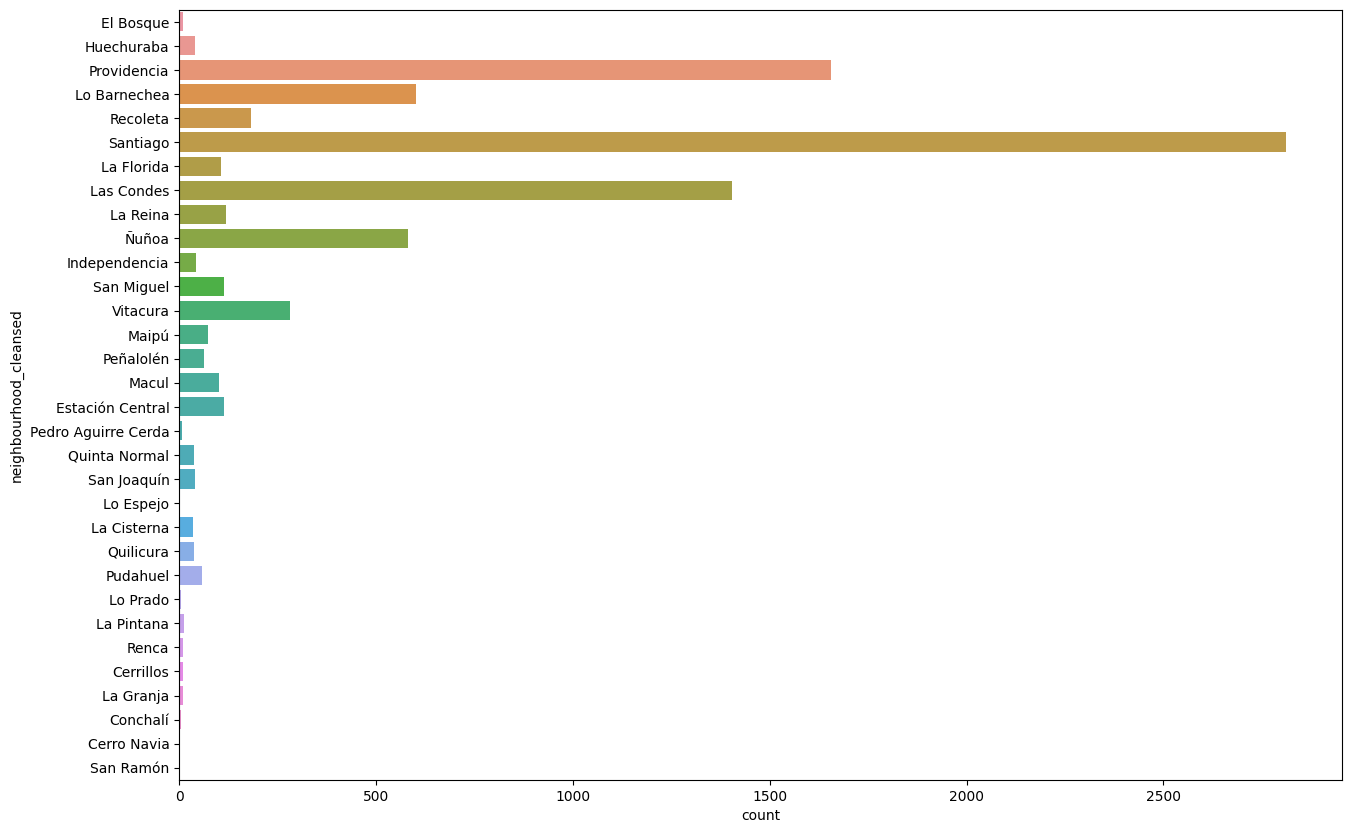

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,10))

sns.countplot(y='neighbourhood_cleansed', data=df)


<AxesSubplot: xlabel='count', ylabel='room_type'>

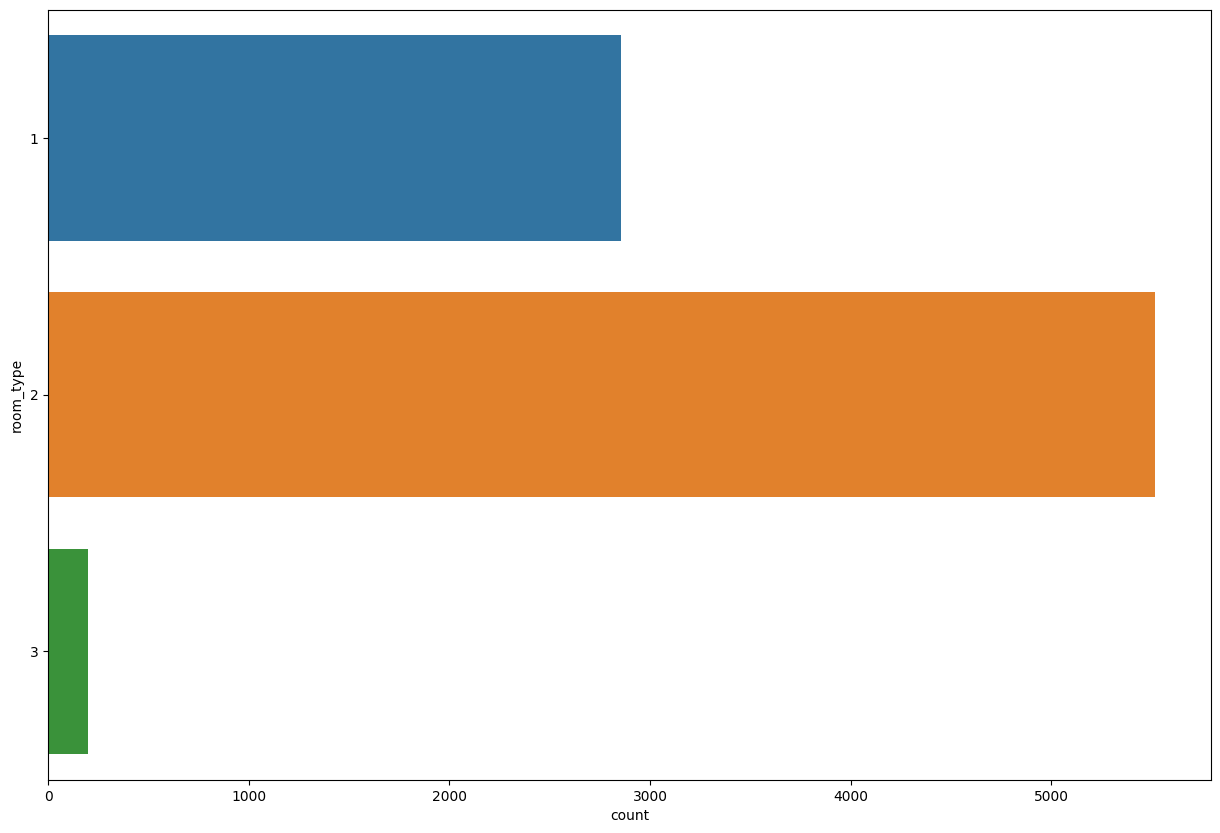

In [49]:
# Plot number of private rooms, entire homes and shared rooms

plt.figure(figsize=(15,10))

sns.countplot(y='room_type', data=df)

In [50]:

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)



In [51]:
# Get max price per neighbourhood

df.groupby('neighbourhood_cleansed')['price'].max()


neighbourhood_cleansed
Cerrillos                220000.0
Cerro Navia               36000.0
Conchalí                  48000.0
El Bosque                100000.0
Estación Central         102800.0
Huechuraba              1080000.0
Independencia          11189600.0
La Cisterna              150000.0
La Florida               210000.0
La Granja                185000.0
La Pintana               377072.0
La Reina                1871325.0
Las Condes              7485300.0
Lo Barnechea            1029229.0
Lo Espejo                 92673.0
Lo Prado                  40000.0
Macul                  18609607.0
Maipú                    250000.0
Pedro Aguirre Cerda       30000.0
Peñalolén                899999.0
Providencia            56139749.0
Pudahuel                9356625.0
Quilicura                233916.0
Quinta Normal            146899.0
Recoleta                 514614.0
Renca                     93566.0
San Joaquín              200000.0
San Miguel               278020.0
San Ramón                

In [52]:
df.shape

(8574, 75)

<AxesSubplot: xlabel='room_type', ylabel='price'>

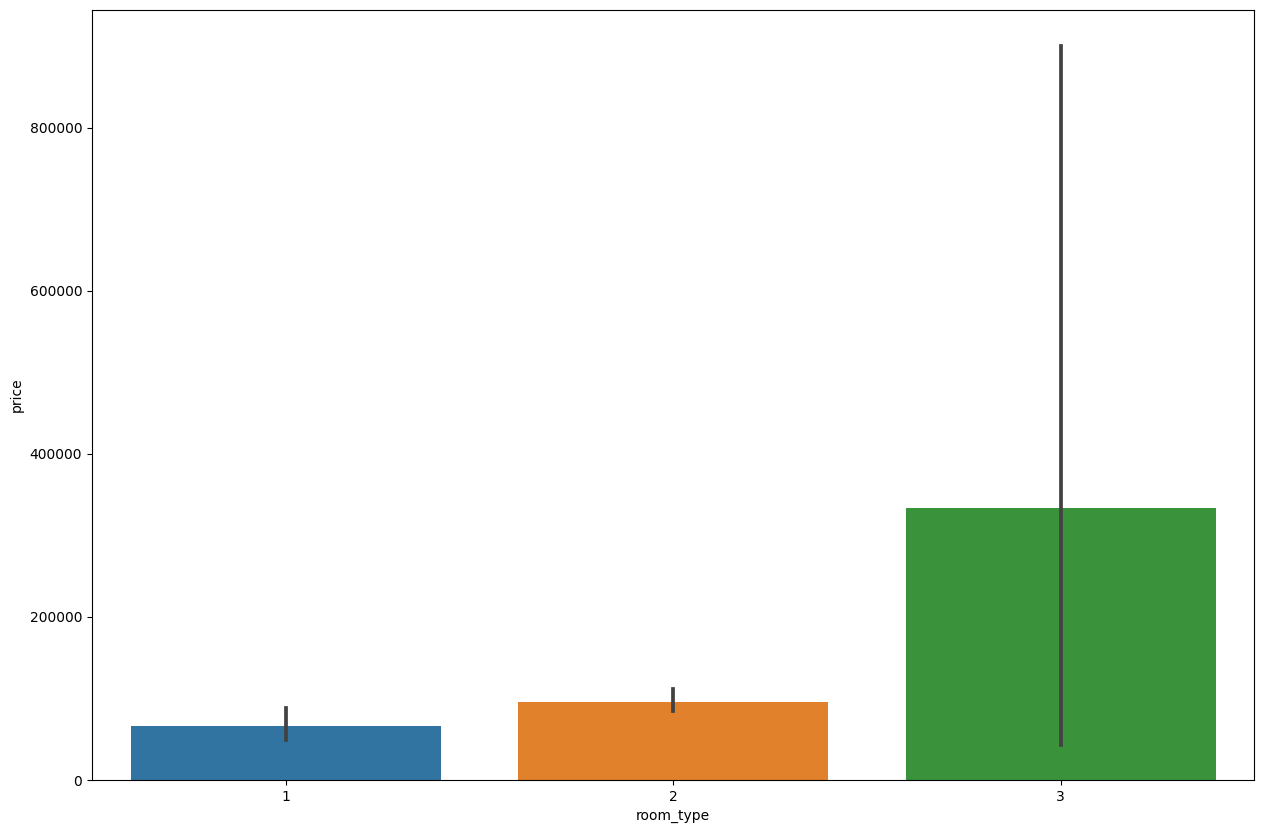

In [53]:
# Plot average price per room type

plt.figure(figsize=(15,10))

sns.barplot(x='room_type', y='price', data=df)


In [54]:
n_dict = {}

for i, name in enumerate(set(df['neighbourhood_cleansed'])):
    n_dict[name] = i

# Sort the dictionary by key

n_dict = dict(sorted(n_dict.items(), key=lambda item: item[1]))

print(n_dict)

{'Vitacura': 0, 'Peñalolén': 1, 'Pedro Aguirre Cerda': 2, 'Macul': 3, 'Santiago': 4, 'Cerrillos': 5, 'Recoleta': 6, 'Quilicura': 7, 'La Florida': 8, 'La Pintana': 9, 'San Ramón': 10, 'Huechuraba': 11, 'La Reina': 12, 'Maipú': 13, 'Lo Espejo': 14, 'Lo Prado': 15, 'El Bosque': 16, 'Independencia': 17, 'Las Condes': 18, 'Renca': 19, 'San Joaquín': 20, 'Conchalí': 21, 'Cerro Navia': 22, 'Estación Central': 23, 'La Granja': 24, 'Pudahuel': 25, 'Lo Barnechea': 26, 'Providencia': 27, 'La Cisterna': 28, 'Ñuñoa': 29, 'San Miguel': 30, 'Quinta Normal': 31}


In [55]:
# Convert neighbourhood names to numbers

for i in range(0,len(df)):
    df['neighbourhood_cleansed'][i] = n_dict[df['neighbourhood_cleansed'][i]]

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33491101,https://www.airbnb.com/rooms/33491101,20220922013638,2022-09-22,city scrape,Casita refugio interior,NaN,"Es un lugar tranquilo, hay almacenes de barrio...",https://a0.muscache.com/pictures/87693f15-22f9...,252327165,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,41380910,https://www.airbnb.com/rooms/41380910,20220922013638,2022-09-22,city scrape,Casa Condominio Piscina Chamisero/8min de Vita...,"Casa Chamisero, diseñada por arquitecto Mathia...",NaN,https://a0.muscache.com/pictures/b75c6983-a281...,110039387,...,4.25,4.75,4.00,NaN,t,1,1,0,0,0.13
2,49392,https://www.airbnb.com/rooms/49392,20220922013638,2022-09-22,city scrape,Share my Flat in Providencia,<b>The space</b><br />Departamento en el barri...,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
3,52811,https://www.airbnb.com/rooms/52811,20220922013638,2022-09-22,city scrape,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Edificio ubicado en el acceso a la línea del M...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,...,4.59,4.64,4.36,NaN,t,3,3,0,0,0.32
4,53494,https://www.airbnb.com/rooms/53494,20220922013638,2022-09-22,city scrape,depto centro ski el colorado chile,<b>The space</b><br />depto 2 dormitorios equi...,NaN,https://a0.muscache.com/pictures/310938/cae3f1...,249097,...,4.89,4.73,4.68,NaN,f,1,1,0,0,0.50


In [56]:
# Remove prices higher than 1000000

df = df[df['price'] < 1000000]

df.shape

(8548, 75)

<AxesSubplot: xlabel='neighbourhood_cleansed', ylabel='price'>

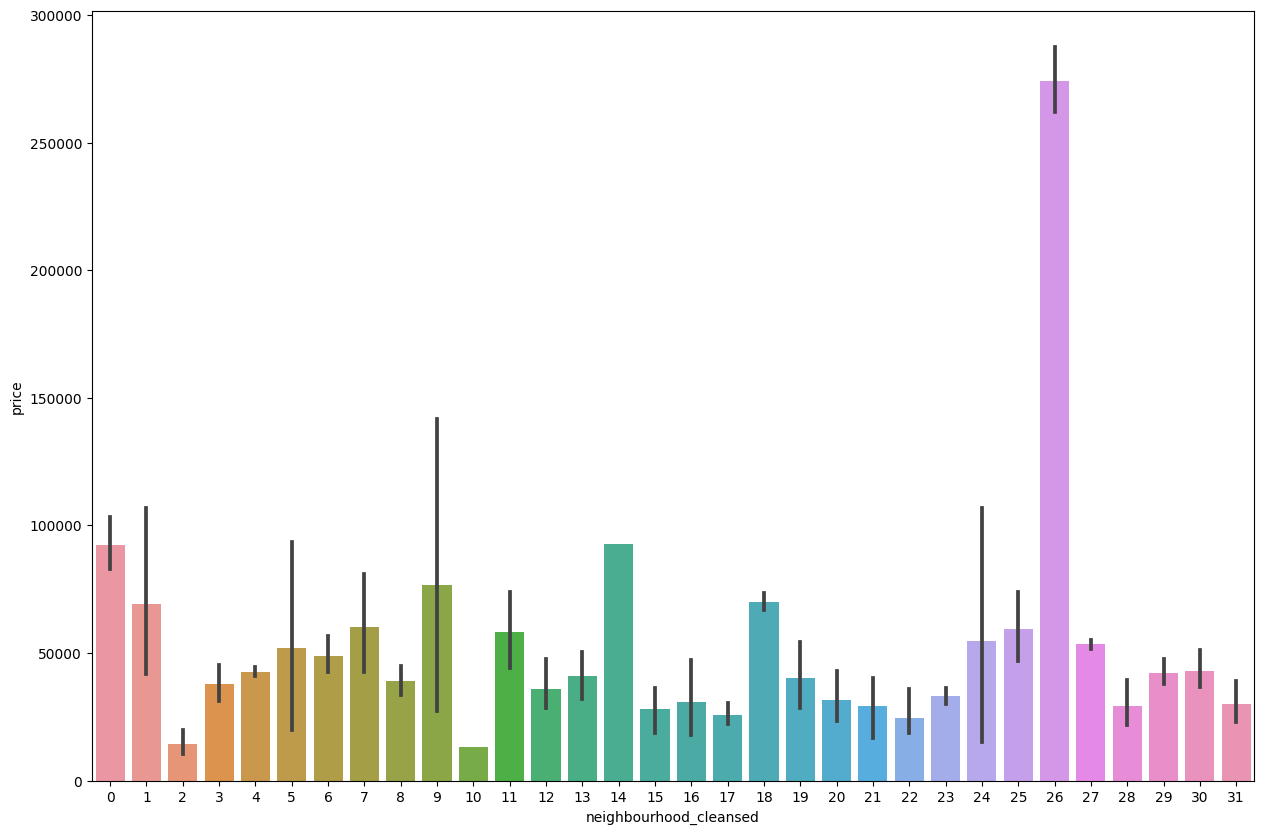

In [57]:
# Plot average price per neighbourhood

plt.figure(figsize=(15,10))

sns.barplot(x='neighbourhood_cleansed', y='price', data=df)



<AxesSubplot: xlabel='neighbourhood_cleansed', ylabel='beds'>

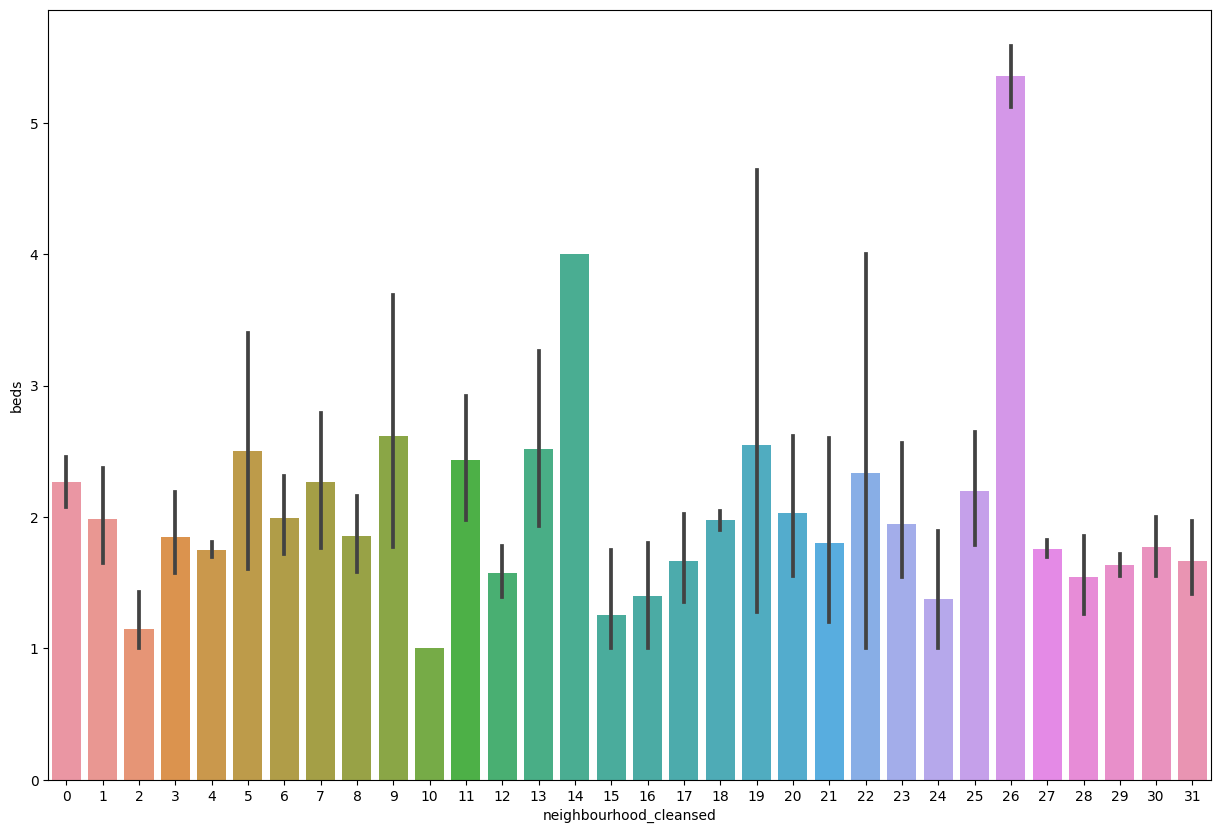

In [58]:
# Plot beds and bathrooms per neighbourhood

plt.figure(figsize=(15,10))

sns.barplot(x='neighbourhood_cleansed', y='beds', data=df)


In [59]:
# Convert last_scraped to datetime

df['last_scraped'] = pd.to_datetime(df['last_scraped'])


In [60]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33491101,https://www.airbnb.com/rooms/33491101,20220922013638,2022-09-22,city scrape,Casita refugio interior,NaN,"Es un lugar tranquilo, hay almacenes de barrio...",https://a0.muscache.com/pictures/87693f15-22f9...,252327165,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,41380910,https://www.airbnb.com/rooms/41380910,20220922013638,2022-09-22,city scrape,Casa Condominio Piscina Chamisero/8min de Vita...,"Casa Chamisero, diseñada por arquitecto Mathia...",NaN,https://a0.muscache.com/pictures/b75c6983-a281...,110039387,...,4.25,4.75,4.00,NaN,t,1,1,0,0,0.13
2,49392,https://www.airbnb.com/rooms/49392,20220922013638,2022-09-22,city scrape,Share my Flat in Providencia,<b>The space</b><br />Departamento en el barri...,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
3,52811,https://www.airbnb.com/rooms/52811,20220922013638,2022-09-22,city scrape,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Edificio ubicado en el acceso a la línea del M...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,...,4.59,4.64,4.36,NaN,t,3,3,0,0,0.32
4,53494,https://www.airbnb.com/rooms/53494,20220922013638,2022-09-22,city scrape,depto centro ski el colorado chile,<b>The space</b><br />depto 2 dormitorios equi...,NaN,https://a0.muscache.com/pictures/310938/cae3f1...,249097,...,4.89,4.73,4.68,NaN,f,1,1,0,0,0.50


In [61]:
# Drop unnecessary columns

df.drop(['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], axis=1, inplace=True)

<AxesSubplot: >

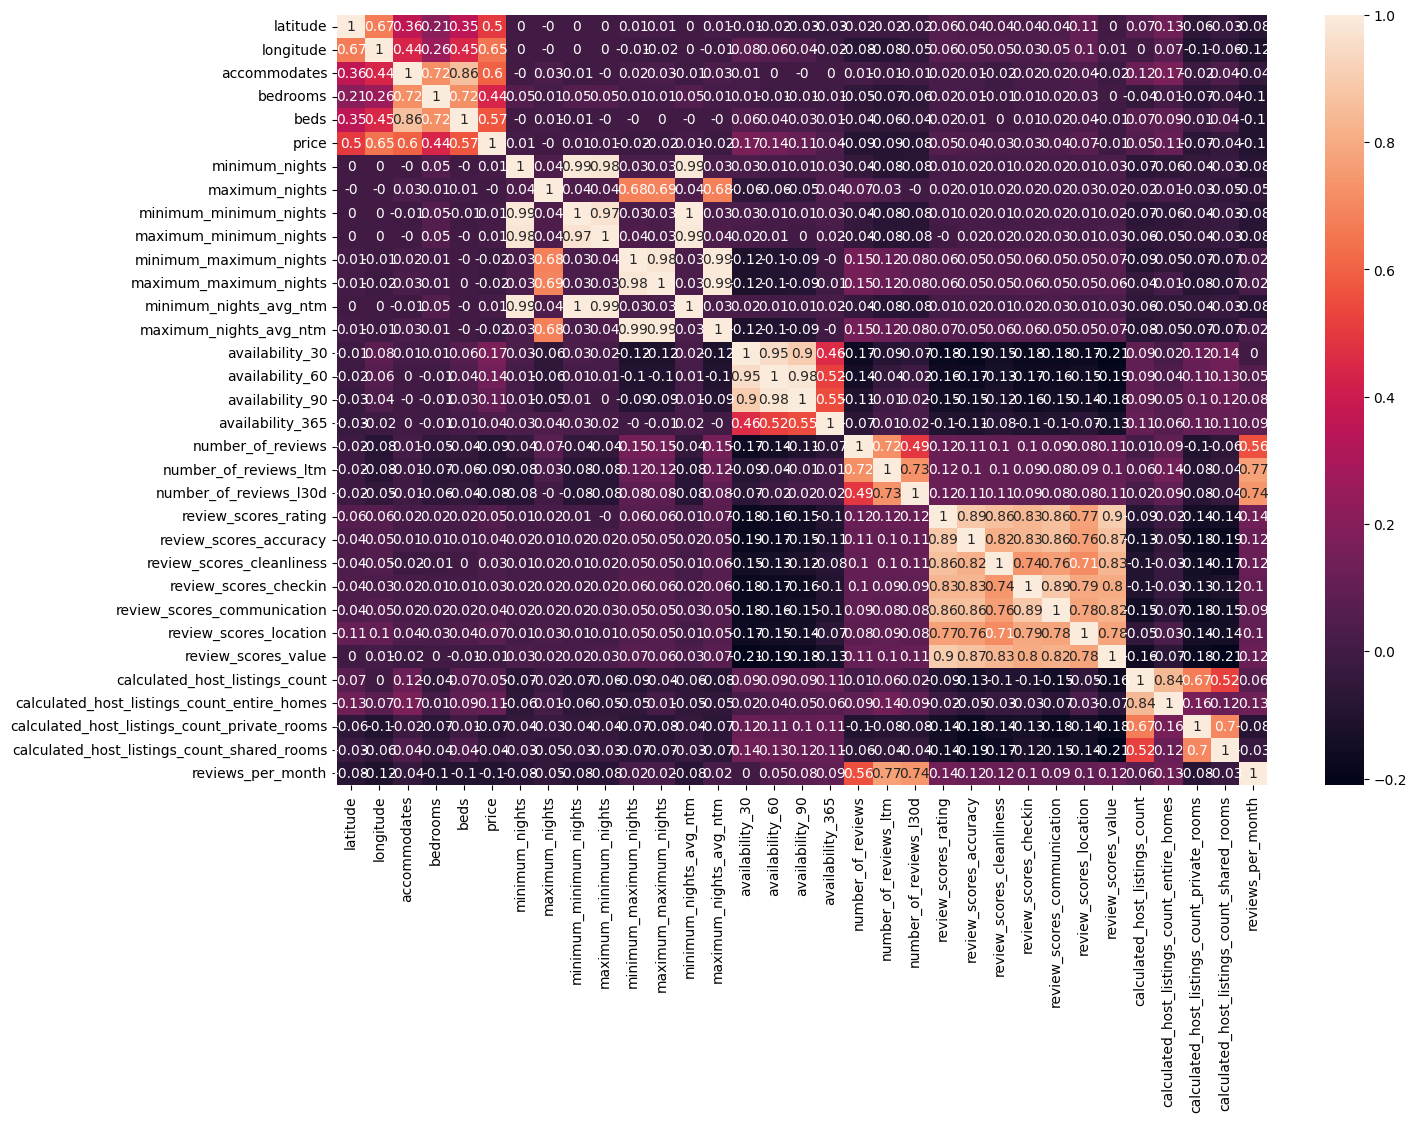

In [62]:
# Create correlation matrix

corr_matrix = df.corr().round(2)

# Plot correlation matrix

plt.figure(figsize=(15,10))

sns.heatmap(data=corr_matrix, annot=True)

In [63]:
locs = df[['latitude', 'longitude']]

locs.dropna(axis=0, inplace=True, how = 'any')

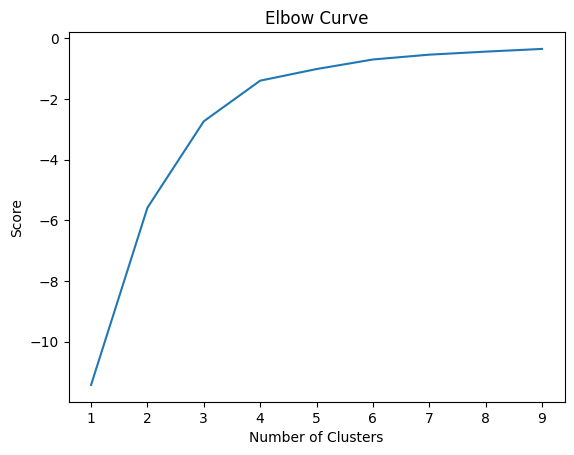

In [64]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = locs[['latitude']]
X_axis = locs[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()

In [65]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')

kmeans.fit(locs[locs.columns[0:2]]) # Compute k-means clustering.

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(locs[locs.columns[0:2]]) # Labels of each point


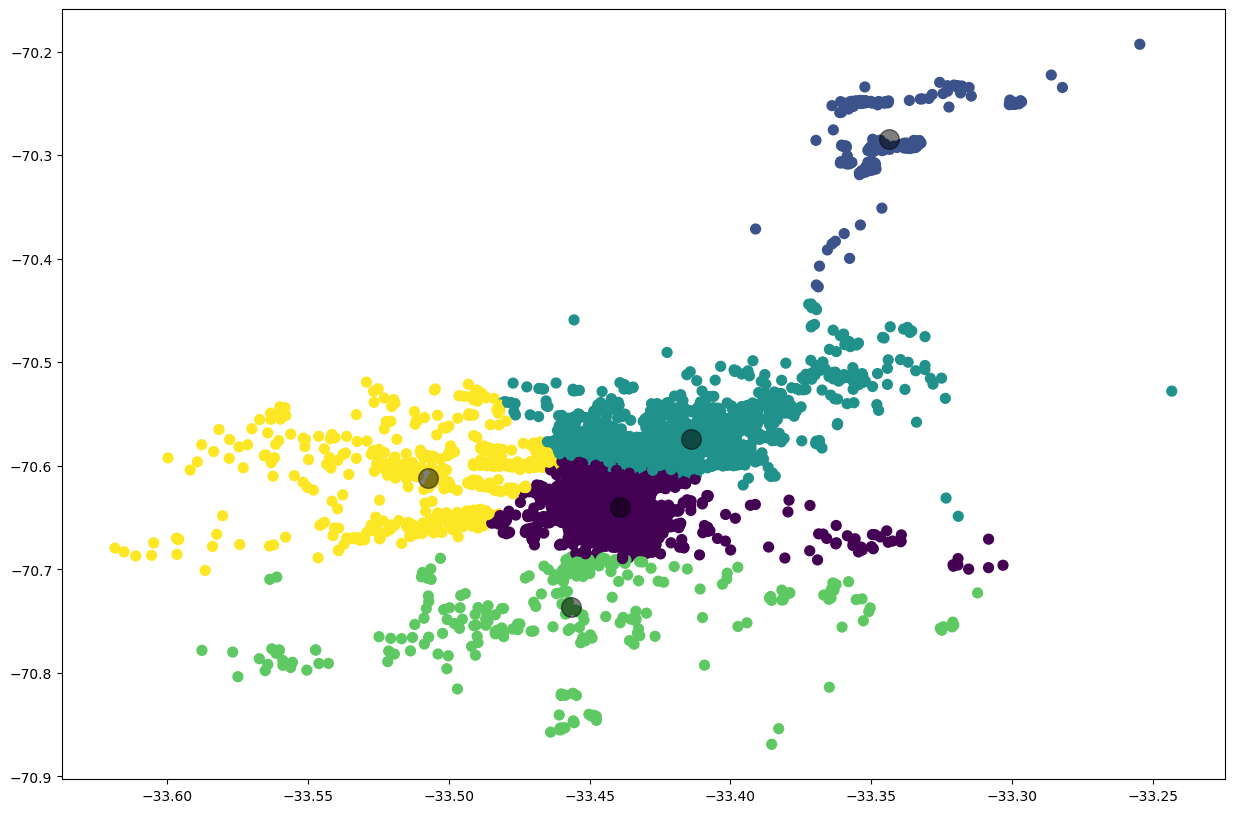

In [66]:
# plot the data points and cluster centers

plt.figure(figsize=(15,10))

plt.scatter(locs['latitude'], locs['longitude'], c=labels, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()


In [67]:
# add cluster labels to dataframe

df['cluster'] = labels

<AxesSubplot: >

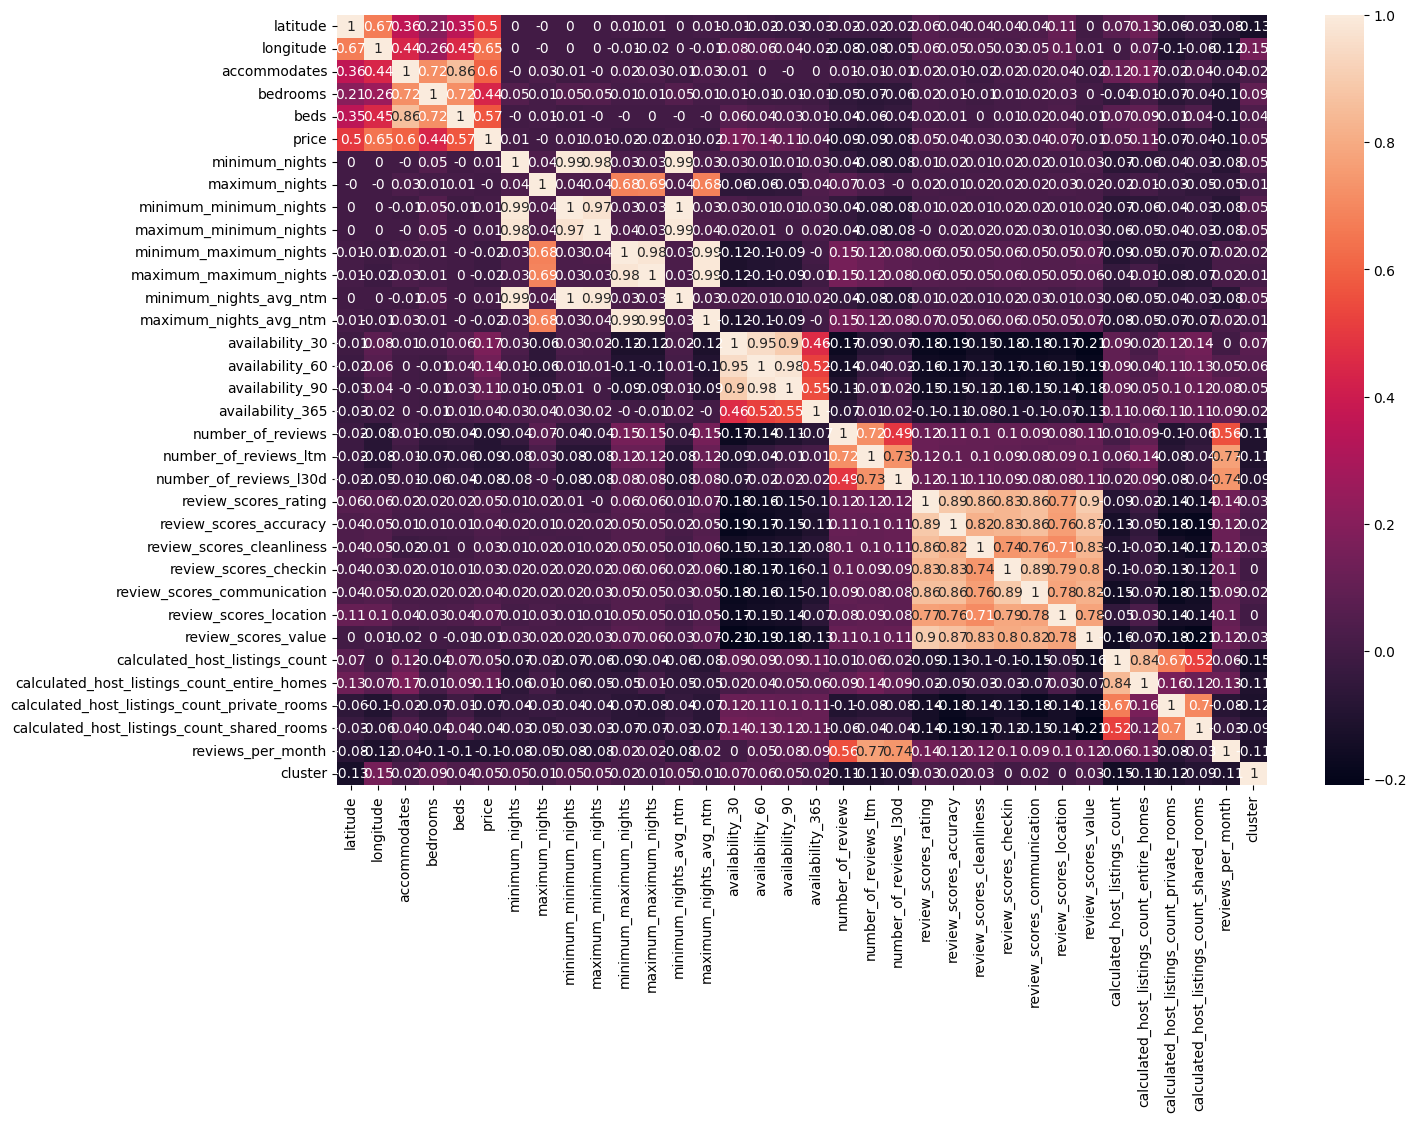

In [68]:
# Create correlation matrix

corr_matrix = df.corr().round(2)

# Plot correlation matrix

plt.figure(figsize=(15,10))

sns.heatmap(data=corr_matrix, annot=True)

In [69]:
cols_to_drop = [
    'minimum_nights',
    'maximum_nights',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month',
]

# Remove cols_to_drop

df.drop(cols_to_drop, axis=1, inplace=True)

In [70]:
df.shape

(8548, 42)

<AxesSubplot: >

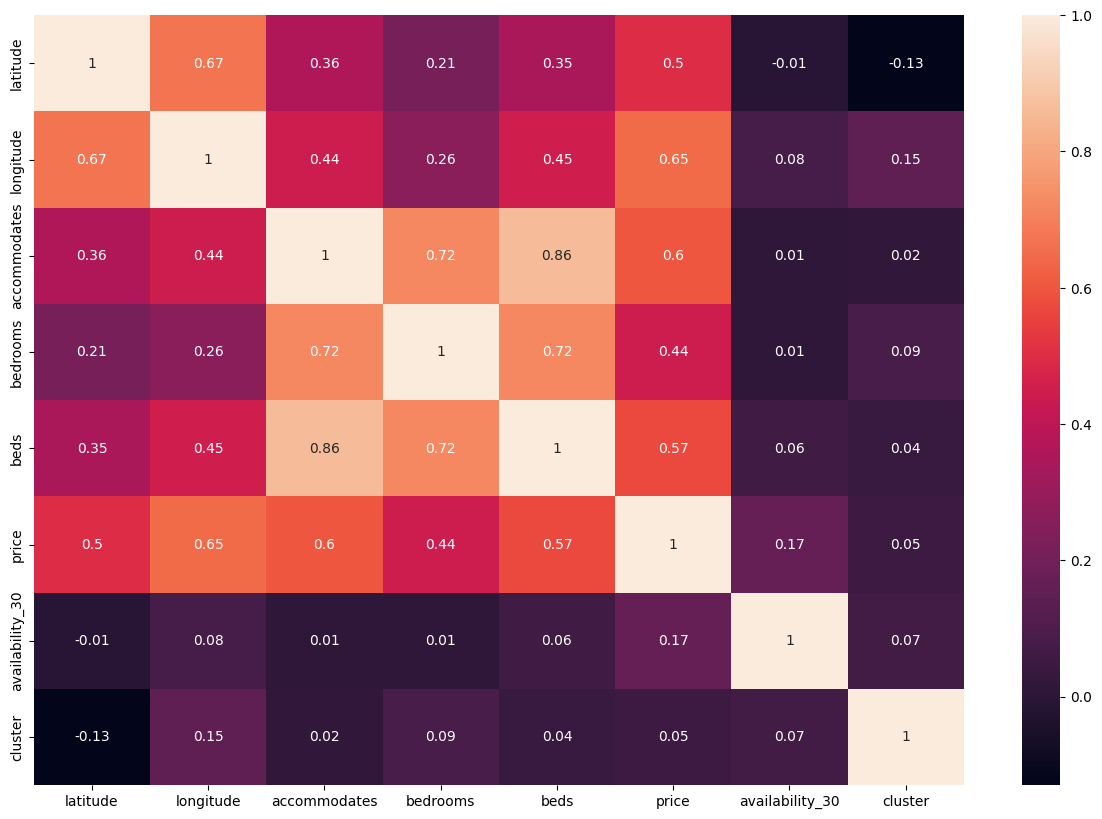

In [71]:
# Create and display correlation matrix

corr_matrix = df.corr().round(2)

plt.figure(figsize=(15,10))

sns.heatmap(data=corr_matrix, annot=True)


In [72]:
# Print column names

df.columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'has_availability',
       'availability_30', 'calendar_last_scraped', 'first_review',
       'last_review', 'license', 'instant_bookable', 'cluster'],
      dtype='object')

In [73]:
# Drop unnecessary columns

cols_to_drop = [
    'listing_url',
    'last_scraped',
    'source',
    'name',
    'description',
    'neighborhood_overview',
    'picture_url',
    'host_url',
    'host_name',
    'host_since',
    'host_location',
    'host_about',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'host_thumbnail_url',
    'host_picture_url',
    'host_neighbourhood',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood',
    'neighbourhood_cleansed',
    'property_type',
    'bathrooms_text',
    'amenities',
    'has_availability',
    'calendar_last_scraped',
    'first_review',
    'last_review',
    'license',
    'instant_bookable',
]

df.drop(cols_to_drop, axis=1, inplace=True)

In [74]:
df.shape

(8548, 9)

In [75]:
df.head()

,latitude,longitude,room_type,accommodates,bedrooms,beds,price,availability_30,cluster
0,-33.56362,-70.70975,1,2,3.0,3.0,30000.0,0,3
1,-33.32342,-70.63119,2,4,3.0,2.0,70000.0,0,2
2,-33.43266,-70.60072,1,1,1.0,1.0,49590.0,28,2
3,-33.42959,-70.61880,2,4,1.0,1.0,50526.0,0,0
4,-33.34344,-70.29432,2,8,2.0,8.0,149999.0,21,1


In [76]:
# Make a copy of the dataframe

df_final = df.copy()

In [77]:
df_final.head()

,latitude,longitude,room_type,accommodates,bedrooms,beds,price,availability_30,cluster
0,-33.56362,-70.70975,1,2,3.0,3.0,30000.0,0,3
1,-33.32342,-70.63119,2,4,3.0,2.0,70000.0,0,2
2,-33.43266,-70.60072,1,1,1.0,1.0,49590.0,28,2
3,-33.42959,-70.61880,2,4,1.0,1.0,50526.0,0,0
4,-33.34344,-70.29432,2,8,2.0,8.0,149999.0,21,1


In [78]:
# Remove cluster column

df_final.drop('cluster', axis=1, inplace=True)

In [79]:
# Drop rows with missing values

df_final.dropna(axis=0, inplace=True, how = 'any')

In [80]:
df_final.shape

(8154, 8)

In [81]:
df_final.head()

,latitude,longitude,room_type,accommodates,bedrooms,beds,price,availability_30
0,-33.56362,-70.70975,1,2,3.0,3.0,30000.0,0
1,-33.32342,-70.63119,2,4,3.0,2.0,70000.0,0
2,-33.43266,-70.60072,1,1,1.0,1.0,49590.0,28
3,-33.42959,-70.61880,2,4,1.0,1.0,50526.0,0
4,-33.34344,-70.29432,2,8,2.0,8.0,149999.0,21


In [100]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X = df_final.drop('price', axis=1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Size of training set: {X_train.shape}')
print(f'Size of test set: {X_test.shape}')

Size of training set: (6523, 7)
Size of test set: (1631, 7)


In [83]:
# Create a linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model to the training data

model.fit(X_train, y_train)

# Predict on the test set

y_pred = model.predict(X_test)

# Calculate the mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean absolute error: {mae}')

# Calculate R^2

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')
    

Mean absolute error: 30118.521983234084
R^2: 0.5648653343756307


In [84]:
# Create a lasso regression model

from sklearn.linear_model import Lasso

model = Lasso()

# Create a dictionary of hyperparameters

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a grid search object

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search

grid.fit(X_train, y_train)

# Save the best model

lasso_best_model = grid.best_estimator_

# Predict on the test set

y_pred = lasso_best_model.predict(X_test)

# Calculate the mean absolute error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean absolute error: {mae}')

# Calculate R^2

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

Mean absolute error: 30072.038746659116
R^2: 0.5651504079423089


In [85]:
# Create a ridge regression model

from sklearn.linear_model import Ridge

model = Ridge()

# Create a dictionary of hyperparameters

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a grid search object

grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search

grid.fit(X_train, y_train)

# Save the best model

ridge_best_model = grid.best_estimator_

# Predict on the test set

y_pred = ridge_best_model.predict(X_test)

# Calculate the mean absolute error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean absolute error: {mae}')

# Calculate R^2

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

Mean absolute error: 29579.045552916232
R^2: 0.5632499149277166


In [86]:
# Create a random forest model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Create a dictionary of hyperparameters

params = {'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [5, 10, 15, 20, 25, 30]}


# Create a grid search object

grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search

grid.fit(X_train, y_train)

# Save the best model

rf_best_model = grid.best_estimator_

# Print the best hyperparameters

print(grid.best_params_)

# Predict on the test set

y_pred = rf_best_model.predict(X_test)

# Calculate the mean absolute error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean absolute error: {mae}')

# Calculate R^2

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')



{'max_depth': 10, 'n_estimators': 300}
Mean absolute error: 23101.245103837635
R^2: 0.6694343544012273


In [87]:
# Save the random forest model

import pickle

pickle.dump(rf_best_model, open('rf_model.pkl', 'wb'))

In [103]:
# Open the model

model = pickle.load(open('rf_model.pkl', 'rb'))

# Predict on a new observation

print(model.predict([[-33.39432344575856, -70.55871072243072, 1, 6, 3, 2, 10]]))

[97342.45491796]


In [111]:
# Create xgbost model

from xgboost import XGBRegressor

xgb = XGBRegressor()


# Convert the train and test sets into numpy arrays

X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

# Create a dictionary of hyperparameters

params = {'max_depth': [3, 5, 7, 9],
                'n_estimators': [100, 200, 300, 400, 500]}

# Create a grid search object

grid = GridSearchCV(xgb, params, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search

grid.fit(X_train, y_train)

# Save the best model

xgb_best_model = grid.best_estimator_

# Print the best hyperparameters

print(grid.best_params_)

# Predict on the test set

y_pred = xgb_best_model.predict(X_test)

# Calculate the mean absolute error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean absolute error: {mae}')

# Calculate R^2

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

{'max_depth': 3, 'n_estimators': 100}
Mean absolute error: 23678.542810979172
R^2: 0.6708947645884092


In [114]:
# Save the xgboost model

pickle.dump(xgb_best_model, open('xgb_model.pkl', 'wb'))

# Open the model

model = pickle.load(open('xgb_model.pkl', 'rb'))

# Predict on a new observation

print(model.predict([[-33.43135889197688, -70.7189186055426, 1, 3, 3, 2, 10]]))



[24727.02]
